In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
df = pd.read_csv('hr_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
from sklearn.preprocessing import LabelEncoder
cw = LabelEncoder()
df['Department'] = cw.fit_transform(df['Department'])

In [9]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,low
14995,0.37,0.48,2,160,3,0,1,0,8,low
14996,0.37,0.53,2,143,3,0,1,0,8,low
14997,0.11,0.96,6,280,4,0,1,0,8,low


In [11]:
mapping = dict(enumerate(cw.classes_))
print(mapping)

{0: 'IT', 1: 'RandD', 2: 'accounting', 3: 'hr', 4: 'management', 5: 'marketing', 6: 'product_mng', 7: 'sales', 8: 'support', 9: 'technical'}


In [15]:
df['salary'] = cw.fit_transform(df['salary'])
loud = dict(enumerate(cw.classes_))
print(loud)

{0: 'high', 1: 'low', 2: 'medium'}


In [17]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [36]:
S = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(S, df.left, test_size = 0.3)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()

In [70]:
f.fit(X_train, Y_train)

LogisticRegression()

In [72]:
f.score(X_test, Y_test)

0.7751111111111111

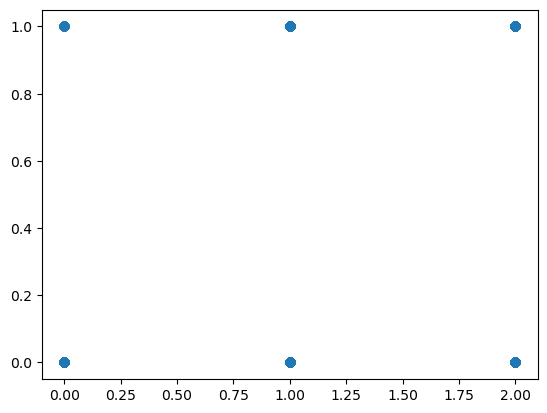

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='salary'>

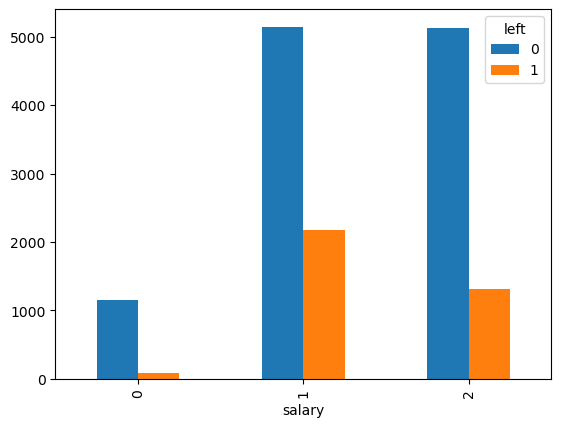

In [88]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

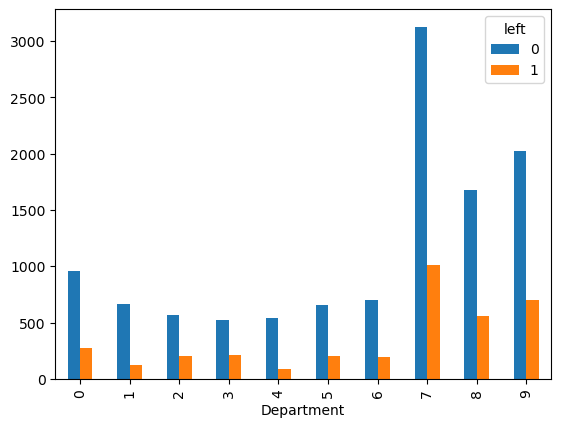

In [92]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')